# Import Libraries and Define Test Function


This cell imports required utility functions, initializes the Rastrigin function as the test optimization function, and defines an initial set of test points in X_data. It also evaluates the function at these points and visualizes the function's 3D surface.

(<Figure size 1850x1050 with 1 Axes>, <Axes3D: >)

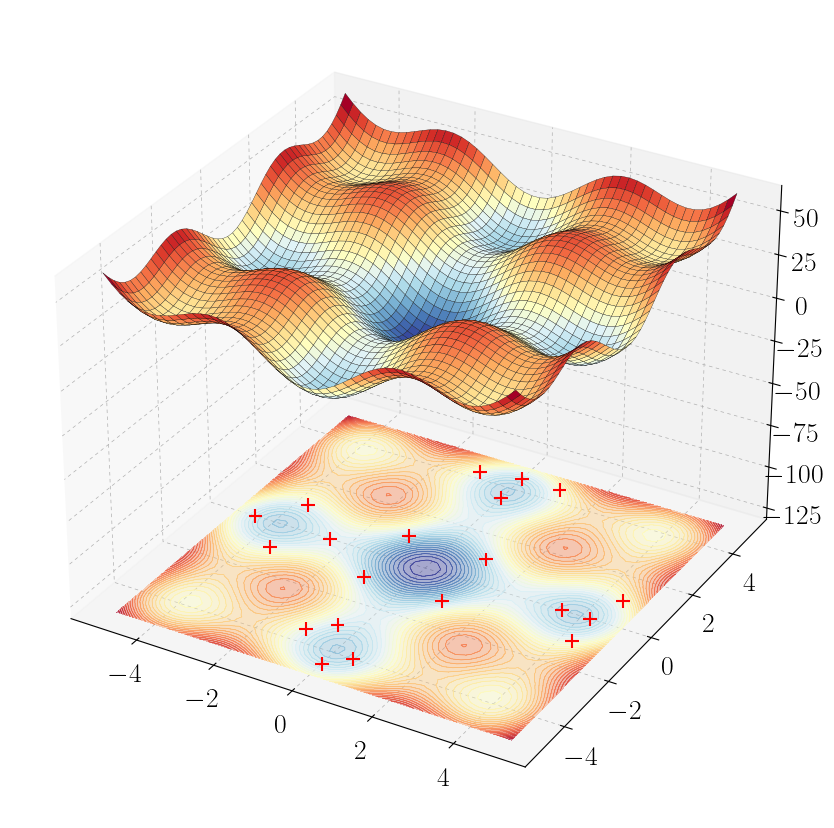

In [3]:
import utils
import numpy as np
import os

utils.good_plt_config()
os.makedirs("outputs", exist_ok=True)

F = utils.rastrigin
X_data = np.array(
    [
        [-1, 1],
        [1, -1],
        [-1, -1],
        [1, 1],
        [0, -4.5],
        [-1, -3.5],
        [-0.5, -3],
        [0.5, -4],
        [0, 3.5],
        [1, 4.5],
        [-1, 4.3],
        [0, 4.5],
        [4.5, 1],
        [3.5, 0],
        [4.3, -1],
        [4.2, 0],
        [-3.5, -1],
        [-4.5, 0],
        [-3.7, 1],
        [-2.5, 0],
        # [-2.3, 2],
        # [2.3, 2],
        # [-2.3, -2],
        # [2.3, -2],
    ]
)


y_data = np.array([F(x) for x in X_data])
utils.plot_3D_surface((-5, 5), (-5, 5), F, X_data)

# Compute and Visualize Attraction Basins


This cell utilizes the `analyze_basins` module to classify the test points into attraction basins and visualize the basins.

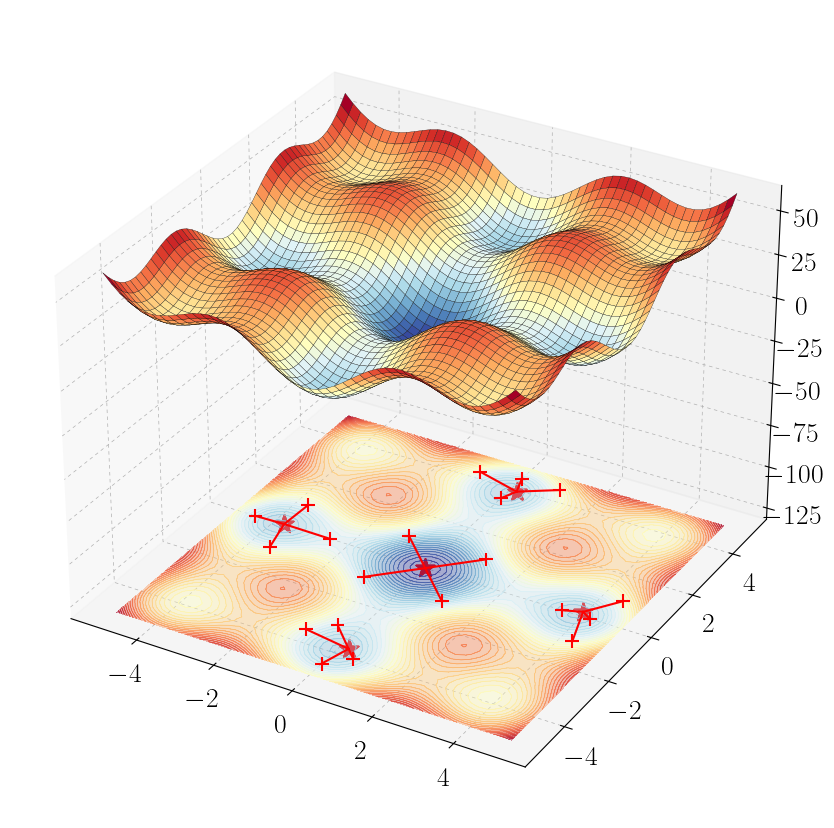

In [4]:
import analyze_basins

bloc = analyze_basins.BasinsLoc()
bloc.alg_closest_points(F, X=X_data, y=y_data)
fig, ax = bloc.plot_attraction_basins(F, X=X_data)

# Test on Sphere Function


This cell switches to a different test function, the Sphere function, and repeats the process of initializing points, evaluating the function, and visualizing the function surface.


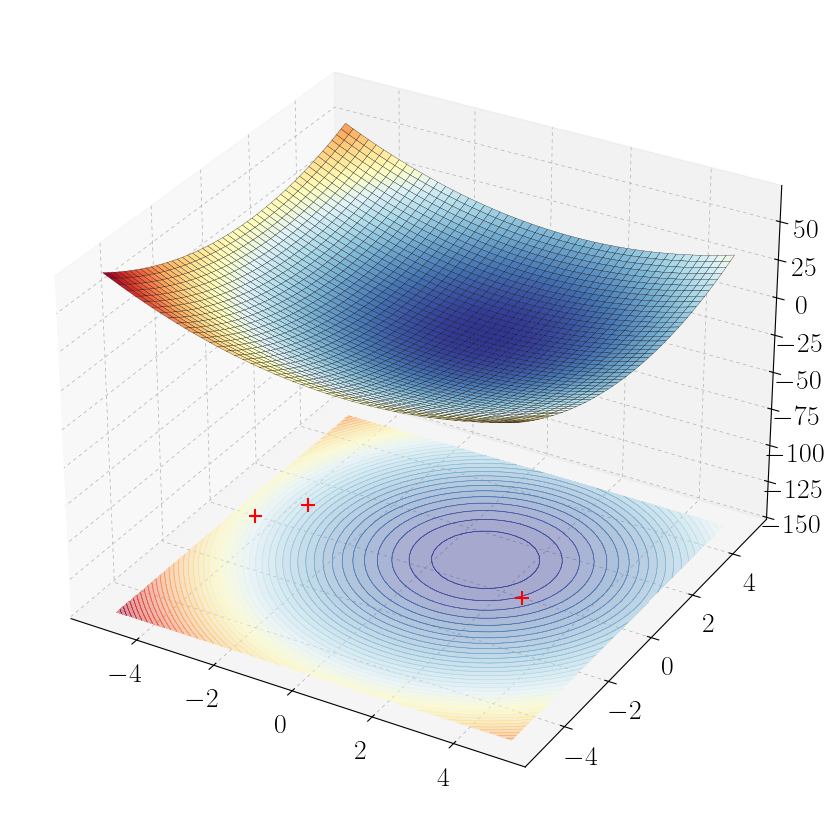

In [5]:
import utils
import numpy as np
from importlib import reload
reload(utils)

utils.good_plt_config()
F = utils.sphere
X_data = np.array(
    [
        [-4.5, 0],
        [-3.7, 1],
        [2.5, 0],
    ]
)


y_data = np.array([F(x) for x in X_data])
ax, fig = utils.plot_3D_surface((-5, 5), (-5, 5), F, X_data)

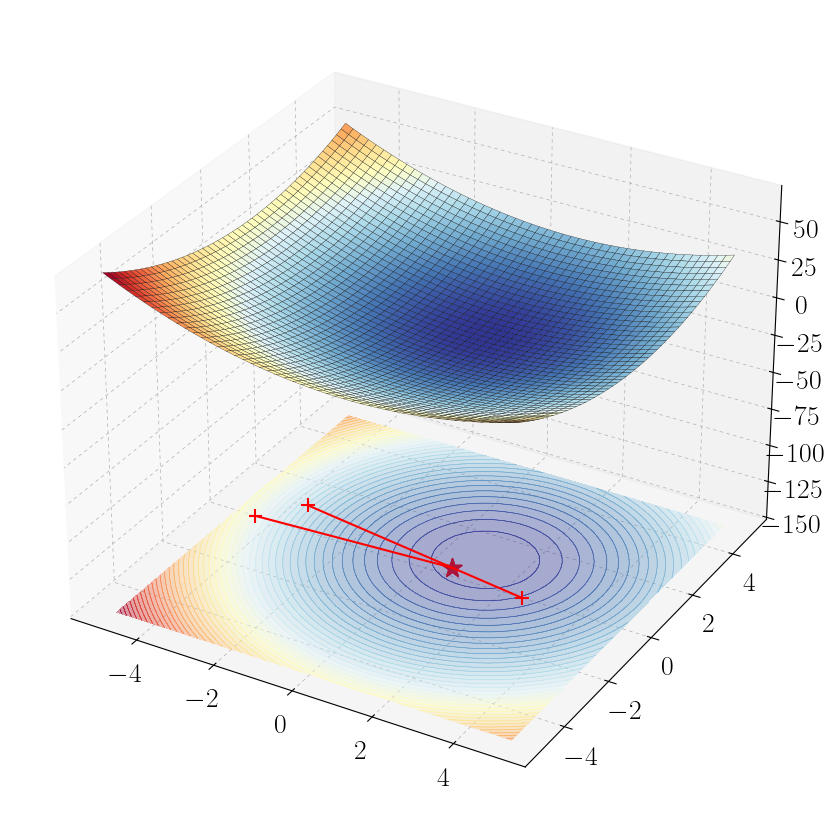

In [6]:
bloc = analyze_basins.BasinsLoc()
bloc.alg_closest_points(F, X=X_data, y=y_data)
fig, ax = bloc.plot_attraction_basins(F, X=X_data)

# Pathfinding in Attraction Basins

This cell implements a pathfinding function to determine whether two points belong to the same attraction basin by checking if an improving path exists between them.

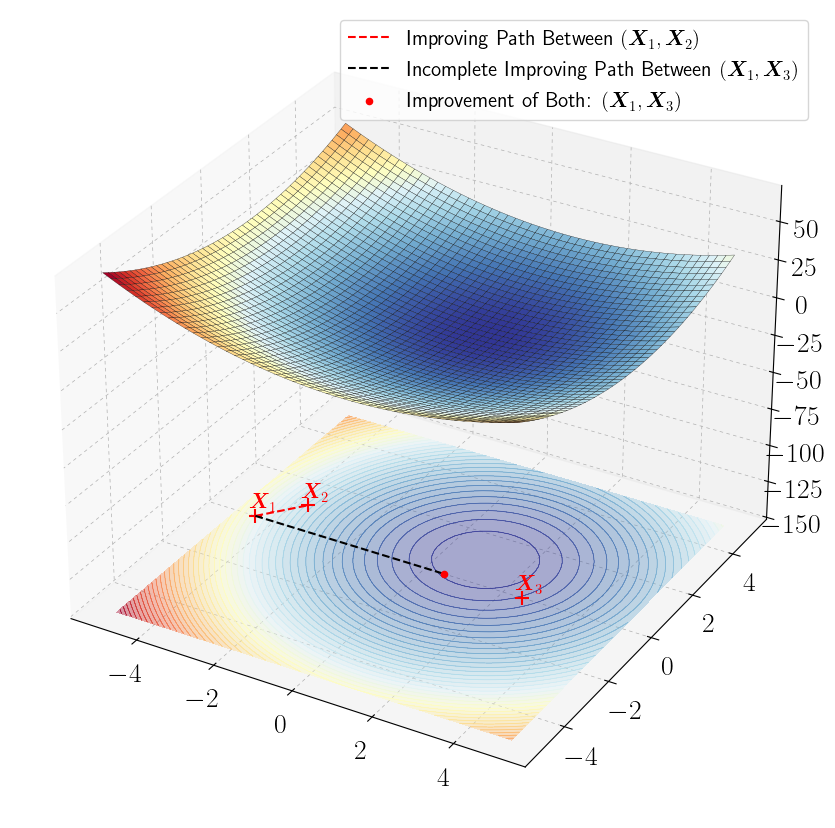

In [7]:
import analyze_basins
import json

fig, ax = utils.plot_3D_surface((-5, 5), (-5, 5), F, X_data)
zax_min, _ = ax.get_zlim()


def check_dominance(p1, p2, F, is_verbose=False):
    bloc = analyze_basins.BasinsLoc()
    ret = bloc.find_path(p1, F(p1), p2, F(p2), F, bloc.MIN_DIST)
    ret.x = ret.x.tolist()
    ret.path = np.array(ret.path).tolist()
    p1_str = ",".join([f"{x:.5f}" for x in p1])
    p2_str = ",".join([f"{x:.5f}" for x in p2])
    if is_verbose:
        print(f"Result of path finding between points [{p1_str}] and [{p2_str}]")
        print(json.dumps(ret.__dict__, indent=4))
    return ret


ret = check_dominance(X_data[0], X_data[1], F)
p = np.array(ret.path)
ax.plot(
    p[:, 0],
    p[:, 1],
    zax_min,
    c="red",
    linestyle="--",
    zorder=4,
    label=r"Improving Path Between $\br{\bm{X}_1, \bm{X}_2}$",
)

ret = check_dominance(X_data[0], X_data[2], F)
p = np.array(ret.path)
ax.plot(
    p[:, 0],
    p[:, 1],
    zax_min,
    c="black",
    linestyle="--",
    zorder=4,
    label=r"Incomplete Improving Path Between $\br{\bm{X}_1, \bm{X}_3}$",
)

ax.text(
    X_data[0, 0] - 0.3,
    X_data[0, 1] + 0.2,
    zax_min,
    zorder=4,
    s=r"$\bm{X}_1$",
    fontsize=15,
    c="red",
)
ax.text(
    X_data[1, 0] - 0.3,
    X_data[1, 1] + 0.2,
    zax_min,
    zorder=4,
    s=r"$\bm{X}_2$",
    fontsize=15,
    c="red",
)
ax.text(
    X_data[2, 0] - 0.3,
    X_data[2, 1] + 0.2,
    zax_min,
    zorder=4,
    s=r"$\bm{X}_3$",
    fontsize=15,
    c="red",
)
ax.scatter(
    p[-1, 0],
    p[-1, 1],
    zax_min,
    "ro",
    c="red",
    zorder=4,
    label=r"Improvement of Both: $(\bm{X}_1, \bm{X}_3)$",
)
ax.legend(fontsize=15)

# Compute and Visualize Attraction Basins for a Function with Banana-Shaped Attraction Basin


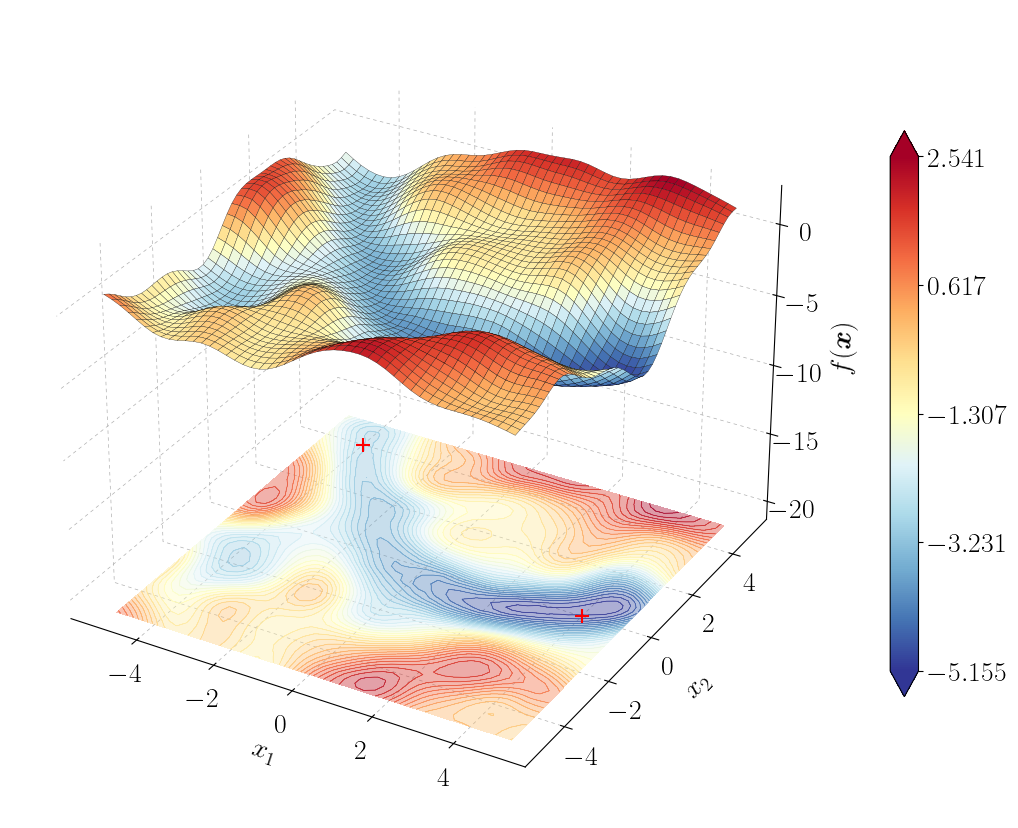

In [8]:
import pickle
import utils
import numpy as np
import os

with open("imgs/f_inter.pkl", "rb") as file:
    f_inter = pickle.load(file)

X_data = np.array([[-4, 4], [4, 0]])
y_data = np.array([f_inter(x) for x in X_data])

utils.good_plt_config()
fig, ax = utils.plot_3D_surface(
    (-5, 5),
    (-5, 5),
    f_inter,
    X_data,
    is_white_facecolor=True,
    is_colorbar=True,
    is_axis_names=True,
)

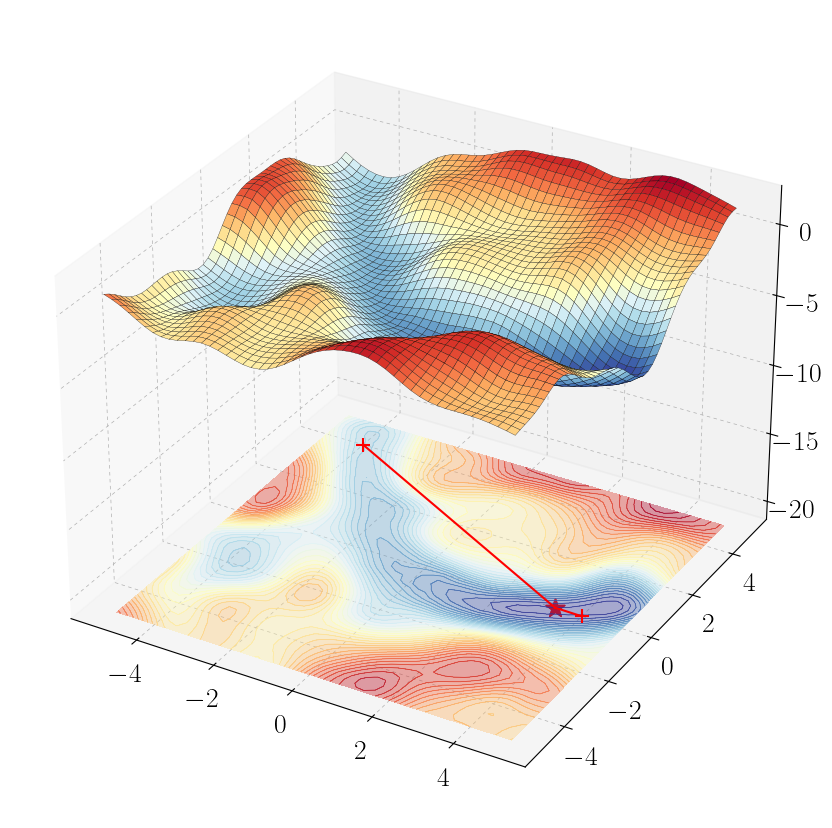

In [9]:
import analyze_basins

bloc = analyze_basins.BasinsLoc()
bloc.alg_closest_points(f_inter, X=X_data, y=y_data)
fig, ax = bloc.plot_attraction_basins(f_inter, X=X_data)